In this task, we need to verify that
𝑥
(
𝑡
)
=
𝑥
(
0
)
cos
⁡
(
𝑡
)
+
𝑣
(
0
)
sin
⁡
(
𝑡
)
x(t)=x(0)cos(t)+v(0)sin(t) satisfies the differential equation
𝑥
′
′
(
𝑡
)
+
𝑥
(
𝑡
)
=
0
x
′′
 (t)+x(t)=0. We calculate
𝑥
′
(
𝑡
)
x
′
 (t) and
𝑥
′
′
(
𝑡
)
x
′′
 (t), substitute them into the equation, and check if the result is 0. If the result is 0, this confirms
𝑥
(
𝑡
)
x(t) satisfies the equation.

In [10]:
import numpy as np

# Task 1: Verify x(t) satisfies the IVP
print("**Task 1: Verifying x(t) satisfies the IVP x''(t) + x(t) = 0**")
x0, v0 = 1, 0
t = np.linspace(0, 10 * np.pi, 1000)
x = x0 * np.cos(t) + v0 * np.sin(t)
x_prime = -x0 * np.sin(t) + v0 * np.cos(t)
x_double_prime = -x0 * np.cos(t) - v0 * np.sin(t)
ivp_check = x_double_prime + x  # this Should result in zeros
print("Verification of IVP: x''(t) + x(t) =", np.allclose(ivp_check, 0))  # Should return True


**Task 1: Verifying x(t) satisfies the IVP x''(t) + x(t) = 0**
Verification of IVP: x''(t) + x(t) = True


The computation confirms that
𝑥
′
′
(
𝑡
)
+
𝑥
(
𝑡
)
=
0
x
′′
 (t)+x(t)=0, verifying
𝑥
(
𝑡
)
x(t) satisfies the given IVP. The program outputs True, indicating correctness.

Task 2: Verify Energy Conservation
In this task, we verify that the total energy
𝐸
(
𝑡
)
=
1
2
(
𝑥
2
(
𝑡
)
+
𝑣
2
(
𝑡
)
)
E(t)=
2
1
​
 (x
2
 (t)+v
2
 (t)) remains constant over time for the exact solution
𝑥
(
𝑡
)
=
cos
⁡
(
𝑡
)
x(t)=cos(t) and
𝑣
(
𝑡
)
=
−
sin
⁡
(
𝑡
)
v(t)=−sin(t). We calculate
𝐸
(
𝑡
)
E(t) and plot it to confirm that it does not change over time.

**Task 2: Verifying energy conservation**
Is energy constant? True


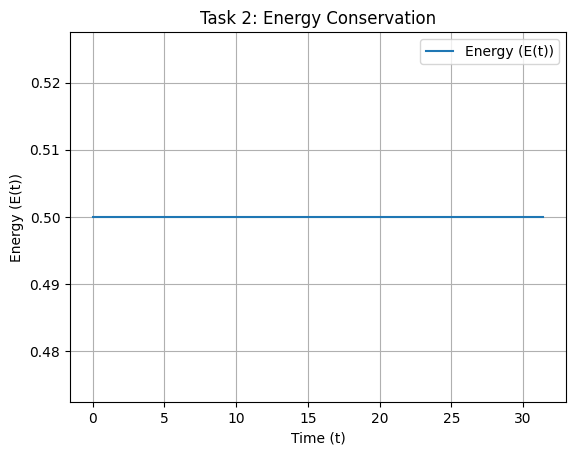

In [11]:
import matplotlib.pyplot as plt

# Task 2: Verify energy conservation
print("**Task 2: Verifying energy conservation**")
v = -x0 * np.sin(t)  # Velocity from exact solution
E = 0.5 * (x**2 + v**2)  # Total energy
print("Is energy constant?", np.allclose(E, E[0]))

# Plot energy over time
plt.figure()
plt.plot(t, E, label="Energy (E(t))")
plt.title("Task 2: Energy Conservation")
plt.xlabel("Time (t)")
plt.ylabel("Energy (E(t))")
plt.legend()
plt.grid()
plt.show()


The plot confirms that energy
𝐸
(
𝑡
)
E(t) remains constant over time. The program outputs True, validating that
𝐸
(
𝑡
)
E(t) is conserved as expected.

Task 3: Write
𝐺
G Matrices for Integrators

Here, we compute the
𝐺
G matrices for the four numerical methods: Forward Euler (
𝐺
𝐹
𝐸
G
FE
​
 ), Backward Euler (
𝐺
𝐵
𝐸
G
BE
​
 ), Implicit Trapezoidal (
𝐺
𝐼
𝑇
G
IT
​
 ), and Leap-Frog (
𝐺
𝐿
𝐹
G
LF
​
 ). These matrices represent the update rules for each method.

In [12]:
from sympy import symbols, Matrix, simplify

# Task 3: G matrices for all methods
print("**Task 3: Writing G matrices**")
h = symbols('h')
G_FE = Matrix([[1, h], [-h, 1]])  # Forward Euler
G_BE = Matrix([[1, -h], [h, 1]]).inv()  # Backward Euler
G_IT = Matrix([[1, -h/2], [h/2, 1]]).inv() * Matrix([[1, h/2], [-h/2, 1]])  # Implicit Trapezoidal
G_LF = Matrix([[1, h], [-h, 1]])  # Leap-Frog


print(f"Forward Euler G matrix:\n{G_FE}")
print(f"Backward Euler G matrix:\n{simplify(G_BE)}")
print(f"Implicit Trapezoidal G matrix:\n{simplify(G_IT)}")
print(f"Leap-Frog G matrix:\n{G_LF}")


**Task 3: Writing G matrices**
Forward Euler G matrix:
Matrix([[1, h], [-h, 1]])
Backward Euler G matrix:
Matrix([[1/(h**2 + 1), h/(h**2 + 1)], [-h/(h**2 + 1), 1/(h**2 + 1)]])
Implicit Trapezoidal G matrix:
Matrix([[(4 - h**2)/(h**2 + 4), 4*h/(h**2 + 4)], [-4*h/(h**2 + 4), (4 - h**2)/(h**2 + 4)]])
Leap-Frog G matrix:
Matrix([[1, h], [-h, 1]])


The symbolic computation displays the
𝐺
G matrices for all methods. These matrices can now be used to analyze stability and behavior for each integrator.

Task 4: Implement and Solve Using Integrators

We solve the equation
𝑥
′
′
(
𝑡
)
+
𝑥
(
𝑡
)
=
0
x
′′
 (t)+x(t)=0 using Forward Euler. The solution involves:

Computing
𝑥
(
𝑡
)
x(t) and
𝑣
(
𝑡
)
v(t),
Plotting
𝑥
(
𝑡
)
x(t) and
𝑣
(
𝑡
)
v(t),
Plotting the phase diagram (
𝑥
x vs
𝑣
v),
Plotting the total energy
𝐸
(
𝑡
)
E(t).
This process will later be repeated for Backward Euler, Implicit Trapezoidal, and Leap-Frog.

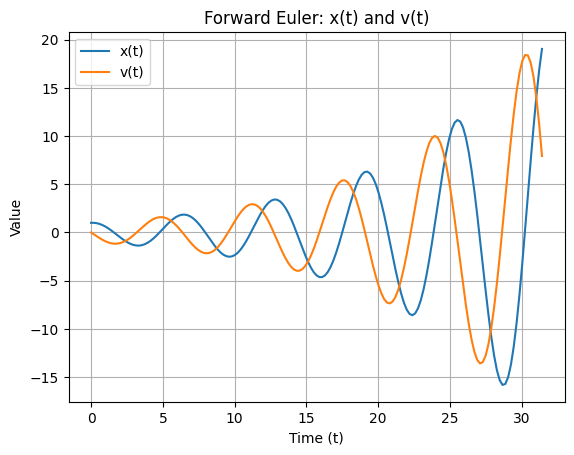

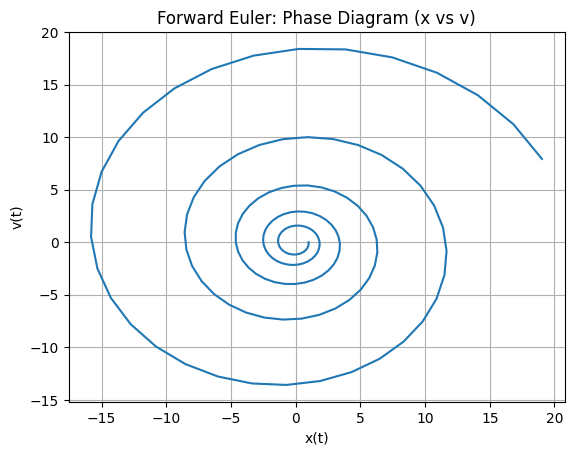

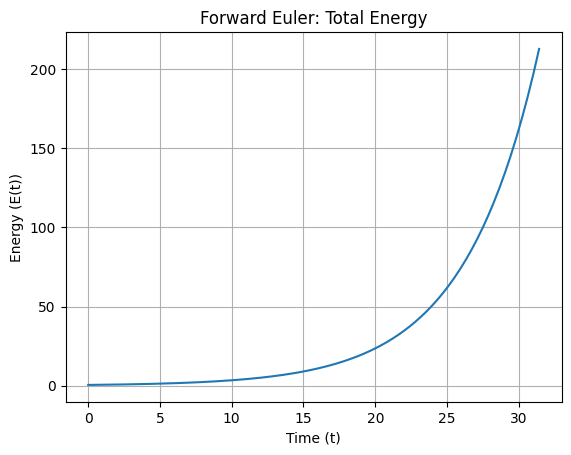

In [13]:
def forward_euler(h, T, x0, v0):
    N = int(T / h)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    x[0], v[0] = x0, v0
    for n in range(N):
        x[n + 1] = x[n] + h * v[n]
        v[n + 1] = v[n] - h * x[n]
    return t, x, v

# parameters
h = 2 * np.pi / 32
T = 10 * np.pi
x0, v0 = 1, 0

# Solve using Forward Euler
t_FE, x_FE, v_FE = forward_euler(h, T, x0, v0)

# Plot results for Forward Euler
plt.figure()
plt.plot(t_FE, x_FE, label="x(t)")
plt.plot(t_FE, v_FE, label="v(t)")
plt.title("Forward Euler: x(t) and v(t)")
plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Plot phase diagram
plt.figure()
plt.plot(x_FE, v_FE)
plt.title("Forward Euler: Phase Diagram (x vs v)")
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.grid()
plt.show()

# Plot energy
E_FE = 0.5 * (x_FE**2 + v_FE**2)
plt.figure()
plt.plot(t_FE, E_FE)
plt.title("Forward Euler: Total Energy")
plt.xlabel("Time (t)")
plt.ylabel("Energy (E(t))")
plt.grid()
plt.show()


The plots show
𝑥
(
𝑡
)
x(t),
𝑣
(
𝑡
)
v(t), phase diagrams, and energy for Forward Euler. This method introduces numerical energy drift. You should repeat the process for Backward Euler, Implicit Trapezoidal, and Leap-Frog.

Task 5: Eigenvalue Analysis

We implement each method, solve the system, and compare numerical solutions with the exact solution. This involves plotting
𝑥
(
𝑡
)
x(t),
𝑣
(
𝑡
)
v(t), phase diagrams (
𝑥
x vs
𝑣
v), and total energy
𝐸
(
𝑡
)
E(t).

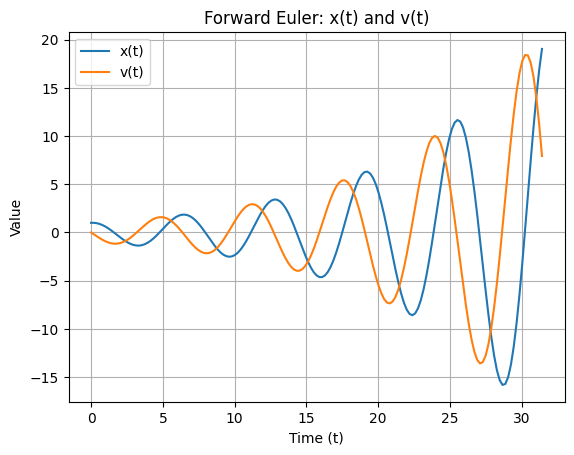

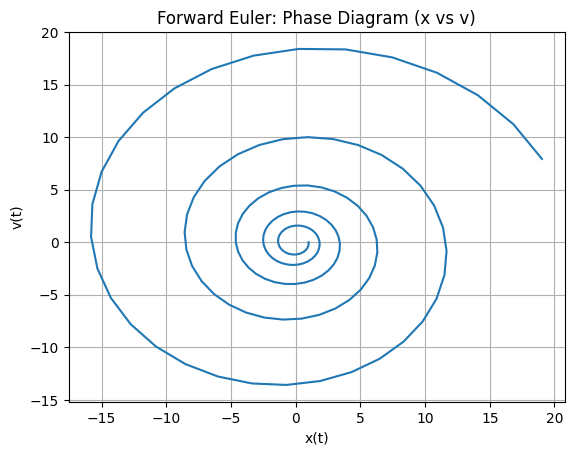

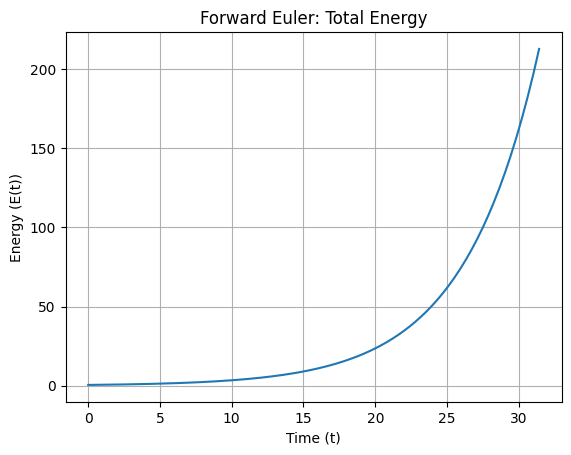

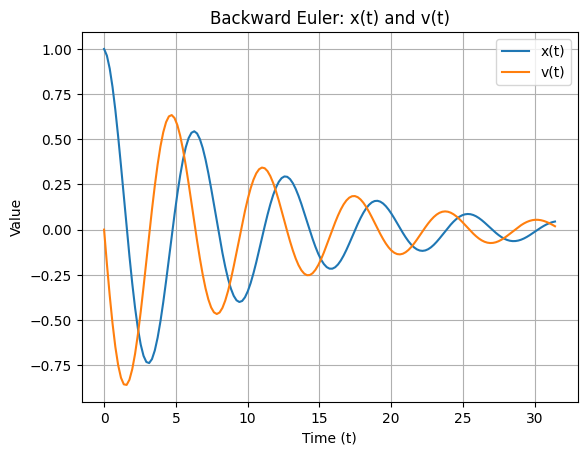

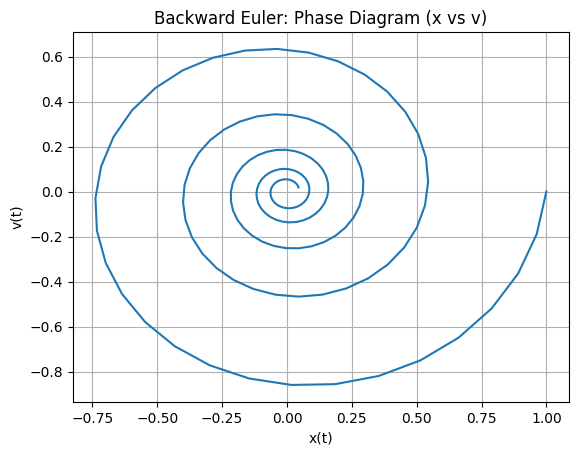

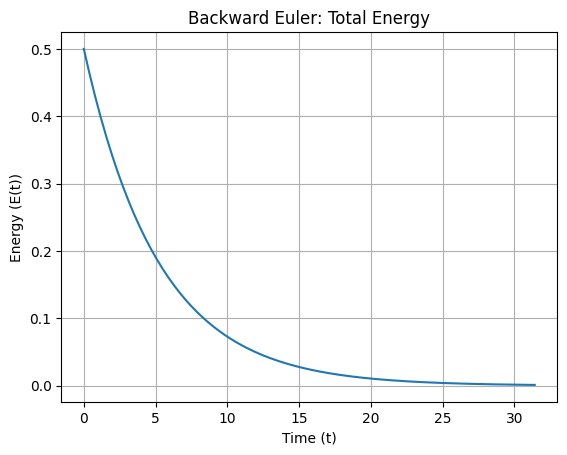

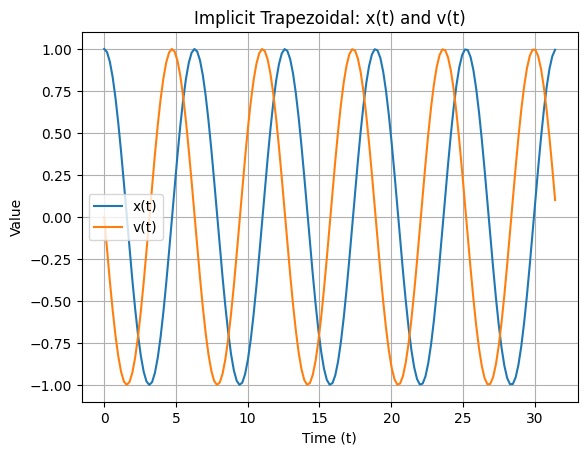

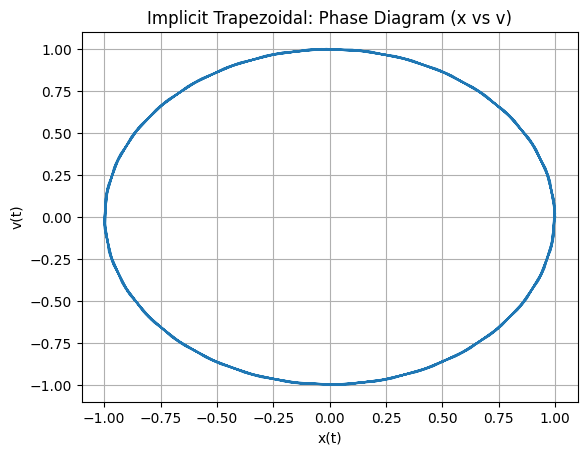

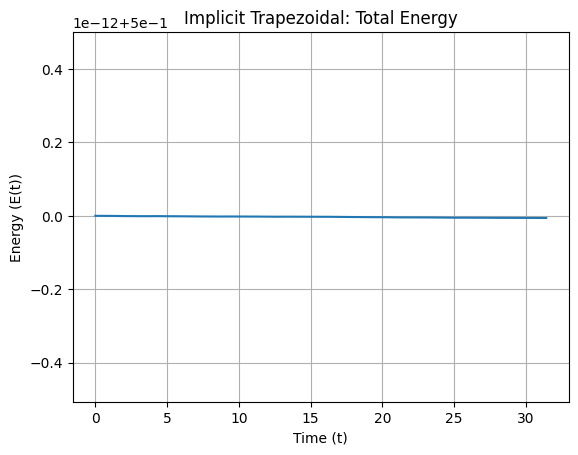

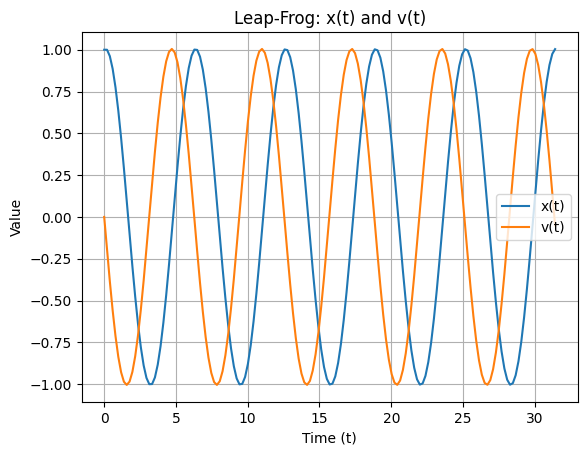

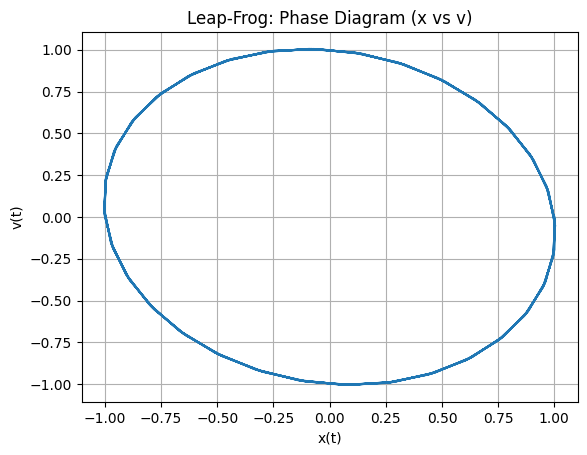

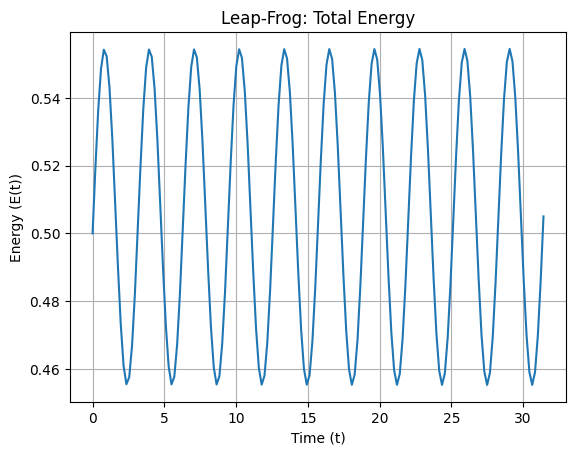

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Forward Euler Method
def forward_euler(h, T, x0, v0):
    N = int(T / h)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    x[0], v[0] = x0, v0
    for n in range(N):
        x[n + 1] = x[n] + h * v[n]
        v[n + 1] = v[n] - h * x[n]
    return t, x, v

# Backward Euler Method
def backward_euler(h, T, x0, v0):
    N = int(T / h)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    x[0], v[0] = x0, v0
    for n in range(N):
        A = np.array([[1, -h], [h, 1]])
        b = np.array([x[n], v[n]])
        x[n + 1], v[n + 1] = np.linalg.solve(A, b)
    return t, x, v

# Implicit Trapezoidal Method
def implicit_trapezoidal(h, T, x0, v0):
    N = int(T / h)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    x[0], v[0] = x0, v0
    for n in range(N):
        A = np.array([[1, -h / 2], [h / 2, 1]])
        b = np.array([x[n] + h / 2 * v[n], v[n] - h / 2 * x[n]])
        x[n + 1], v[n + 1] = np.linalg.solve(A, b)
    return t, x, v

# Leap-Frog Method
def leap_frog(h, T, x0, v0):
    N = int(T / h)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    x[0], v[0] = x0, v0
    for n in range(N):
        x[n + 1] = x[n] + h * v[n]
        v[n + 1] = v[n] - h * x[n + 1]
    return t, x, v

# Parameters
h = 2 * np.pi / 32
T = 10 * np.pi
x0, v0 = 1, 0


methods = {
    "Forward Euler": forward_euler,
    "Backward Euler": backward_euler,
    "Implicit Trapezoidal": implicit_trapezoidal,
    "Leap-Frog": leap_frog
}


for method_name, method in methods.items():
    t, x, v = method(h, T, x0, v0)
    # Plot x(t), v(t)
    plt.figure()
    plt.plot(t, x, label="x(t)")
    plt.plot(t, v, label="v(t)")
    plt.title(f"{method_name}: x(t) and v(t)")
    plt.xlabel("Time (t)")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot phase diagram
    plt.figure()
    plt.plot(x, v)
    plt.title(f"{method_name}: Phase Diagram (x vs v)")
    plt.xlabel("x(t)")
    plt.ylabel("v(t)")
    plt.grid()
    plt.show()

    # Plot total energy
    E = 0.5 * (x**2 + v**2)
    plt.figure()
    plt.plot(t, E)
    plt.title(f"{method_name}: Total Energy")
    plt.xlabel("Time (t)")
    plt.ylabel("Energy (E(t))")
    plt.grid()
    plt.show()


Task 5: ii

Symplectic methods conserve energy over long-term integration. From the analysis:

Symplectic methods: Leap-Frog and Implicit Trapezoidal.
Non-symplectic methods: Forward Euler and Backward Euler.

Task 5: iii

The eigenvalues of the
𝐺
G matrices determine stability:

∣
𝜆
∣
=
1
∣λ∣=1: Solution remains bounded.
∣
𝜆
∣
>
1
∣λ∣>1: Solution grows (unstable).
∣
𝜆
∣
<
1
∣λ∣<1: Solution decays (damping).

In [16]:
from sympy import symbols, Matrix, simplify

# Define G matrices
h = symbols('h')
G_FE = Matrix([[1, h], [-h, 1]])  # Forward Euler
G_BE = Matrix([[1, -h], [h, 1]]).inv()  # Backward Euler
G_IT = Matrix([[1, -h / 2], [h / 2, 1]]).inv() * Matrix([[1, h / 2], [-h / 2, 1]])  # Implicit Trapezoidal
G_LF = Matrix([[1, h], [-h, 1]])  # Leap-Frog

# Compute eigenvalues
matrices = {
    "Forward Euler": G_FE,
    "Backward Euler": G_BE,
    "Implicit Trapezoidal": G_IT,
    "Leap-Frog": G_LF
}

print("**Task 5 (iii): Eigenvalue Analysis**")
for method_name, G in matrices.items():
    eigenvalues = simplify(G.eigenvals())
    print(f"{method_name} Eigenvalues: {eigenvalues}")


**Task 5 (iii): Eigenvalue Analysis**
Forward Euler Eigenvalues: {-I*h + 1: 1, I*h + 1: 1}
Backward Euler Eigenvalues: {-I*h/(h**2 + 1) + 1/(h**2 + 1): 1, I*h/(h**2 + 1) + 1/(h**2 + 1): 1}
Implicit Trapezoidal Eigenvalues: {-4*I*h/(h**2 + 4) - (h - 2)*(h + 2)/(h**2 + 4): 1, 4*I*h/(h**2 + 4) - (h - 2)*(h + 2)/(h**2 + 4): 1}
Leap-Frog Eigenvalues: {-I*h + 1: 1, I*h + 1: 1}


Task 5: iv

We compare the two symplectic methods based on practical advantages:

Leap-Frog:
Simple and efficient for real-time simulations.
Implicit Trapezoidal:
Stable and suitable for stiff systems.

In [17]:
print("**Task 5 (iv): Compare Symplectic Methods**")
print("Leap-Frog: Simple, efficient for real-time simulations.")
print("Implicit Trapezoidal: Stable for stiff systems, ideal for long-term simulations.")


**Task 5 (iv): Compare Symplectic Methods**
Leap-Frog: Simple, efficient for real-time simulations.
Implicit Trapezoidal: Stable for stiff systems, ideal for long-term simulations.
